## Gráficos del ejercicio a entregar de la guía 2

Links de interés a la hora de hacer gráficos:  
Letras griegas y Latex  
https://matplotlib.org/stable/tutorials/text/mathtext.html  
Colores  
https://matplotlib.org/stable/gallery/color/named_colors.html  
Legend's location  
https://stackoverflow.com/questions/4700614/how-to-put-the-legend-outside-the-plot  


In [1]:
#Importo librerías
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
import matplotlib
import math
pi = math.pi


### Péndulo Simple

#### Trayectoria

In [2]:
#Importo los datos
datos = genfromtxt('datos/sol_aprox.csv', delimiter=',')

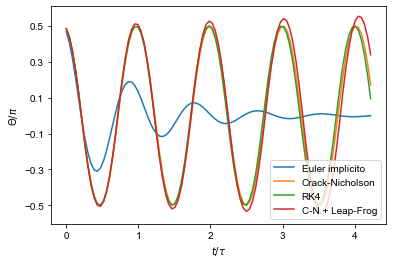

In [3]:
#Grafico
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 14}
matplotlib.rc('font', **font)
tau = 2.3452

plt.plot(datos[:,0]/tau, datos[:,1]/pi, label='Euler implícito')
plt.plot(datos[:,0]/tau, datos[:,2]/pi, label='Crack-Nicholson')
plt.plot(datos[:,0]/tau, datos[:,3]/pi, label='RK4')
plt.plot(datos[:,0]/tau, datos[:,4]/pi, label='C-N + Leap-Frog')
#Parámetros del gráfico:
plt.legend(loc='lower right')
plt.xlabel(r'$t/\tau$')
plt.ylabel('$\Theta/\pi$')
# plt.xticks(x, my_xticks)
# plt.yticks(np.arange(y.min(), y.max(), 0.005))
plt.yticks(np.arange(-0.5,0.5 + 0.2,0.2))


#Guardo el gráfico
plt.savefig('sol_aprox.pdf', format='pdf',bbox_inches = "tight")

#### Error de fase y amplitud para el péndulo simple para tita_inicial = pi/2

In [4]:
#Importo datos
datos_amplitud = genfromtxt('datos/simple_pi2_error_amplitud.csv', delimiter=',')
datos_fase = genfromtxt('datos/simple_pi2_error_fase.csv', delimiter=',')
datos_h = genfromtxt('datos/simple_pi2_error_h.csv', delimiter=',')

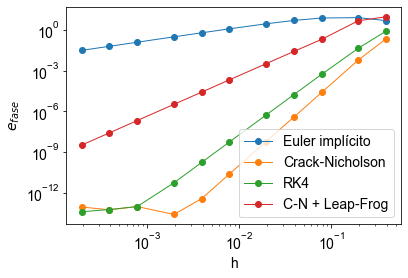

In [5]:
#Grafico
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 14}
matplotlib.rc('font', **font)
tau = 2.3452

plt.plot(datos_h, np.abs(datos_amplitud[:,0]), label='Euler implícito',marker='o',linewidth=1)
plt.plot(datos_h, np.abs(datos_amplitud[:,1]), label='Crack-Nicholson',marker='o',linewidth=1)
plt.plot(datos_h, np.abs(datos_amplitud[:,2]), label='RK4',marker='o',linewidth=1)
plt.plot(datos_h, np.abs(datos_amplitud[:,3]), label='C-N + Leap-Frog',marker='o',linewidth=1)
#Parámetros del gráfico:
plt.legend(loc='lower right')
plt.xlabel('h')
plt.ylabel('$e_{fase}$')
# plt.xticks(x, my_xticks)
# plt.yticks(np.arange(y.min(), y.max(), 0.005))
# plt.yticks(np.arange(-0.5,0.5 + 0.2,0.2))
plt.xscale("log")
plt.yscale("log")

#Guardo el gráfico
plt.savefig('error_amplitud.pdf', format='pdf',bbox_inches = "tight")

Orden de convergencia Euler implícito:  0.9372575985568138 +/- 0.01902503308713794
Orden de convergencia Crack-Nicholson:  5.790183279314054 +/- 0.09070012637078931
Orden de convergencia RK4:  4.872347720305063 +/- 0.03460069824650806
Orden de convergencia C-N + Leap-Frog:  2.9552896088114005 +/- 0.04216313986505771


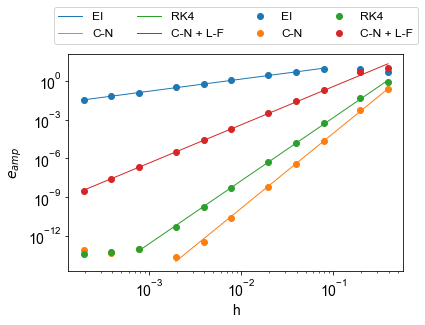

In [6]:
#ERROR DE AMPLITUD

#Hago un ajuste lineal sobre los datos y grafico todo junto a las rectas

#Parámetros de la fuente del gráfico
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 14}
matplotlib.rc('font', **font)

#Defino los límites sobre los que calcularé los ajustes lineales
limits_EI = [2,len(datos_amplitud[:,0])]
limits_CN = [0,len(datos_amplitud[:,0])-3]
limits_RK4 = [0,len(datos_amplitud[:,0])-2]
limits_CNLF = [0,len(datos_amplitud[:,0])]

#Ajuste lineal
x, y = datos_h[limits_EI[0]:limits_EI[1]], datos_amplitud[limits_EI[0]:limits_EI[1],0]
coefs, matrix_cov = np.polyfit(np.log(x), np.log(np.abs(y)), 1, cov = True)
m, b = coefs[0], coefs[1]
print("Orden de convergencia Euler implícito: ", m, "+/-", matrix_cov[0,0]**0.5)
plt.plot(x, np.exp(m*np.log(x) + b), label='EI',linewidth=1, color = "tab:blue")

x, y = datos_h[limits_CN[0]:limits_CN[1]], datos_amplitud[limits_CN[0]:limits_CN[1],1]
coefs, matrix_cov = np.polyfit(np.log(x), np.log(np.abs(y)), 1, cov = True)
m, b = coefs[0], coefs[1]
print("Orden de convergencia Crack-Nicholson: ", m, "+/-", matrix_cov[0,0]**0.5)
plt.plot(x, np.exp(m*np.log(x) + b), label='C-N',linewidth=1, color = "tab:orange")

x, y = datos_h[limits_RK4[0]:limits_RK4[1]], datos_amplitud[limits_RK4[0]:limits_RK4[1],2]
coefs, matrix_cov = np.polyfit(np.log(x), np.log(np.abs(y)), 1, cov = True)
m, b = coefs[0], coefs[1]
print("Orden de convergencia RK4: ", m, "+/-", matrix_cov[0,0]**0.5)
plt.plot(x, np.exp(m*np.log(x) + b), label='RK4',linewidth=1, color = "tab:green")

x, y = datos_h[limits_CNLF[0]:limits_CNLF[1]], datos_amplitud[limits_CNLF[0]:limits_CNLF[1],3]
coefs, matrix_cov = np.polyfit(np.log(x), np.log(np.abs(y)), 1, cov = True)
m, b = coefs[0], coefs[1]
print("Orden de convergencia C-N + Leap-Frog: ", m, "+/-", matrix_cov[0,0]**0.5)
plt.plot(x, np.exp(m*np.log(x) + b), label='C-N + L-F',linewidth=1, color = "tab:red")



plt.plot(datos_h, np.abs(datos_amplitud[:,0]), label='EI',marker='o',linewidth=0, color = "tab:blue")
plt.plot(datos_h, np.abs(datos_amplitud[:,1]), label='C-N',marker='o',linewidth=0, color = "tab:orange")
plt.plot(datos_h, np.abs(datos_amplitud[:,2]), label='RK4',marker='o',linewidth=0, color = "tab:green")
plt.plot(datos_h, np.abs(datos_amplitud[:,3]), label='C-N + L-F',marker='o',linewidth=0, color = "tab:red")
#Parámetros del gráfico:
plt.legend(loc='lower center', ncol = 4, bbox_to_anchor=(0, 1.02, 1, 0.2),fontsize = 12)
plt.xlabel('h')
plt.ylabel('$e_{amp}$')
# plt.xticks(x, my_xticks)
# plt.yticks(np.arange(y.min(), y.max(), 0.005))
# plt.yticks(np.arange(-0.5,0.5 + 0.2,0.2))
# plt.xlim(10.0**-4, 10.0**0)
plt.xscale("log")
plt.yscale("log")

#Guardo el gráfico
plt.savefig('error_amplitud_simple_pi2.pdf', format='pdf',bbox_inches = "tight")




Orden de convergencia Euler implícito:  0.9094202564952926 +/- 0.03070835705396524
Orden de convergencia Crack-Nicholson:  1.9609514818114762 +/- 0.019260309080823608
Orden de convergencia RK4:  3.9163907216640714 +/- 0.02044736620447468
Orden de convergencia C-N + Leap-Frog:  1.8573616277295897 +/- 0.04875131838369911


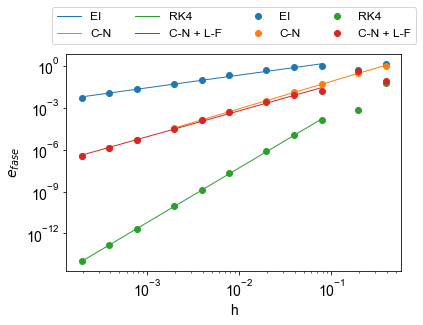

In [7]:
#ERROR DE FASE

#Hago un ajuste lineal sobre los datos y grafico todo junto a las rectas

#Parámetros de la fuente del gráfico
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 14}
matplotlib.rc('font', **font)

#Defino los límites sobre los que calcularé los ajustes lineales
limits_EI = [2,len(datos_fase[:,0])]
limits_CN = [0,len(datos_fase[:,0])-3]
limits_RK4 = [2,len(datos_fase[:,0])]
limits_CNLF = [2,len(datos_fase[:,0])]

#Ajuste lineal
x, y = datos_h[limits_EI[0]:limits_EI[1]], datos_fase[limits_EI[0]:limits_EI[1],0]
coefs, matrix_cov = np.polyfit(np.log(x), np.log(np.abs(y)), 1, cov = True)
m, b = coefs[0], coefs[1]
print("Orden de convergencia Euler implícito: ", m, "+/-", matrix_cov[0,0]**0.5)
plt.plot(x, np.exp(m*np.log(x) + b), label='EI',linewidth=1, color = "tab:blue")

x, y = datos_h[limits_CN[0]:limits_CN[1]], datos_fase[limits_CN[0]:limits_CN[1],1]
coefs, matrix_cov = np.polyfit(np.log(x), np.log(np.abs(y)), 1, cov = True)
m, b = coefs[0], coefs[1]
print("Orden de convergencia Crack-Nicholson: ", m, "+/-", matrix_cov[0,0]**0.5)
plt.plot(x, np.exp(m*np.log(x) + b), label='C-N',linewidth=1, color = "tab:orange")

x, y = datos_h[limits_RK4[0]:limits_RK4[1]], datos_fase[limits_RK4[0]:limits_RK4[1],2]
coefs, matrix_cov = np.polyfit(np.log(x), np.log(np.abs(y)), 1, cov = True)
m, b = coefs[0], coefs[1]
print("Orden de convergencia RK4: ", m, "+/-", matrix_cov[0,0]**0.5)
plt.plot(x, np.exp(m*np.log(x) + b), label='RK4',linewidth=1, color = "tab:green")

x, y = datos_h[limits_CNLF[0]:limits_CNLF[1]], datos_fase[limits_CNLF[0]:limits_CNLF[1],3]
coefs, matrix_cov = np.polyfit(np.log(x), np.log(np.abs(y)), 1, cov = True)
m, b = coefs[0], coefs[1]
print("Orden de convergencia C-N + Leap-Frog: ", m, "+/-", matrix_cov[0,0]**0.5)
plt.plot(x, np.exp(m*np.log(x) + b), label='C-N + L-F',linewidth=1, color = "tab:red")



plt.plot(datos_h, np.abs(datos_fase[:,0]), label='EI',marker='o',linewidth=0, color = "tab:blue")
plt.plot(datos_h, np.abs(datos_fase[:,1]), label='C-N',marker='o',linewidth=0, color = "tab:orange")
plt.plot(datos_h, np.abs(datos_fase[:,2]), label='RK4',marker='o',linewidth=0, color = "tab:green")
plt.plot(datos_h, np.abs(datos_fase[:,3]), label='C-N + L-F',marker='o',linewidth=0, color = "tab:red")
#Parámetros del gráfico:
plt.legend(loc='lower center', ncol = 4, bbox_to_anchor=(0, 1.02, 1, 0.2),fontsize = 12)
plt.xlabel('h')
plt.ylabel('$e_{fase}$')
# plt.xticks(x, my_xticks)
# plt.yticks(np.arange(y.min(), y.max(), 0.005))
# plt.yticks(np.arange(-0.5,0.5 + 0.2,0.2))
# plt.xlim(10.0**-4, 10.0**0)
plt.xscale("log")
plt.yscale("log")

#Guardo el gráfico
plt.savefig('error_fase_simple_pi2.pdf', format='pdf',bbox_inches = "tight")



#### Error de fase y amplitud para el péndulo simple para tita_inicial = 0.01

In [8]:
#Importo datos
datos_amplitud = genfromtxt('datos/simple_0.01_error_amplitud.csv', delimiter=',')
datos_fase = genfromtxt('datos/simple_0.01_error_fase.csv', delimiter=',')
datos_h = genfromtxt('datos/simple_0.01_error_h.csv', delimiter=',')

Orden de convergencia Euler implícito:  0.9125871407963045 +/- 0.023038374694042806
Orden de convergencia RK4:  4.940148423340664 +/- 0.023908301779203472
Orden de convergencia C-N + Leap-Frog:  3.0099767594644535 +/- 0.004694372715781479


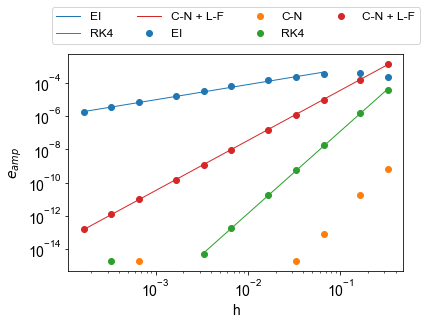

In [9]:
#ERROR DE AMPLITUD

#Hago un ajuste lineal sobre los datos y grafico todo junto a las rectas

#Parámetros de la fuente del gráfico
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 14}
matplotlib.rc('font', **font)

#Defino los límites sobre los que calcularé los ajustes lineales
limits_EI = [2,len(datos_amplitud[:,0])]
limits_CN = [0,4]
limits_RK4 = [0,7]
limits_CNLF = [0,len(datos_amplitud[:,0])]

#Ajuste lineal
x, y = datos_h[limits_EI[0]:limits_EI[1]], datos_amplitud[limits_EI[0]:limits_EI[1],0]
coefs, matrix_cov = np.polyfit(np.log(x), np.log(np.abs(y)), 1, cov = True)
m, b = coefs[0], coefs[1]
print("Orden de convergencia Euler implícito: ", m, "+/-", matrix_cov[0,0]**0.5)
plt.plot(x, np.exp(m*np.log(x) + b), label='EI',linewidth=1, color = "tab:blue")

# x, y = datos_h[limits_CN[0]:limits_CN[1]], datos_amplitud[limits_CN[0]:limits_CN[1],1]
# coefs, matrix_cov = np.polyfit(np.log(x), np.log(np.abs(y)), 1, cov = True)
# m, b = coefs[0], coefs[1]
# print("Orden de convergencia Crack-Nicholson: ", m, "+/-", matrix_cov[0,0]**0.5)
# plt.plot(x, np.exp(m*np.log(x) + b), label='C-N',linewidth=1, color = "tab:orange")

x, y = datos_h[limits_RK4[0]:limits_RK4[1]], datos_amplitud[limits_RK4[0]:limits_RK4[1],2]
coefs, matrix_cov = np.polyfit(np.log(x), np.log(np.abs(y)), 1, cov = True)
m, b = coefs[0], coefs[1]
print("Orden de convergencia RK4: ", m, "+/-", matrix_cov[0,0]**0.5)
plt.plot(x, np.exp(m*np.log(x) + b), label='RK4',linewidth=1, color = "tab:green")

x, y = datos_h[limits_CNLF[0]:limits_CNLF[1]], datos_amplitud[limits_CNLF[0]:limits_CNLF[1],3]
coefs, matrix_cov = np.polyfit(np.log(x), np.log(np.abs(y)), 1, cov = True)
m, b = coefs[0], coefs[1]
print("Orden de convergencia C-N + Leap-Frog: ", m, "+/-", matrix_cov[0,0]**0.5)
plt.plot(x, np.exp(m*np.log(x) + b), label='C-N + L-F',linewidth=1, color = "tab:red")



plt.plot(datos_h, np.abs(datos_amplitud[:,0]), label='EI',marker='o',linewidth=0, color = "tab:blue")
plt.plot(datos_h, np.abs(datos_amplitud[:,1]), label='C-N',marker='o',linewidth=0, color = "tab:orange")
plt.plot(datos_h, np.abs(datos_amplitud[:,2]), label='RK4',marker='o',linewidth=0, color = "tab:green")
plt.plot(datos_h, np.abs(datos_amplitud[:,3]), label='C-N + L-F',marker='o',linewidth=0, color = "tab:red")
#Parámetros del gráfico:
plt.legend(loc='lower center', ncol = 4, bbox_to_anchor=(0, 1.02, 1, 0.2),fontsize = 12)
plt.xlabel('h')
plt.ylabel('$e_{amp}$')
# plt.xticks(x, my_xticks)
# plt.yticks(np.arange(y.min(), y.max(), 0.005))
# plt.yticks(np.arange(-0.5,0.5 + 0.2,0.2))
# plt.xlim(10.0**-4, 10.0**0)
plt.xscale("log")
plt.yscale("log")

#Guardo el gráfico
plt.savefig('error_amplitud_simple_angulo_bajo.pdf', format='pdf',bbox_inches = "tight")



Orden de convergencia Euler implícito:  1.969515531340741 +/- 0.02352945286109731
Orden de convergencia Crack-Nicholson:  1.9315725179531302 +/- 0.031743969584564165
Orden de convergencia RK4:  4.020308658595079 +/- 0.020460933506094077
Orden de convergencia C-N + Leap-Frog:  1.9591911569629437 +/- 0.019303222788158225


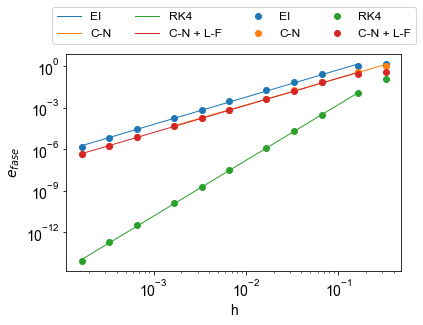

In [10]:
#ERROR DE FASE

#Hago un ajuste lineal sobre los datos y grafico todo junto a las rectas

#Parámetros de la fuente del gráfico
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 14}
matplotlib.rc('font', **font)

#Defino los límites sobre los que calcularé los ajustes lineales
limits_EI = [1,len(datos_fase[:,0])]
limits_CN = [0,len(datos_fase[:,0])-3]
limits_RK4 = [1,len(datos_fase[:,0])]
limits_CNLF = [1,len(datos_fase[:,0])]

#Ajuste lineal
x, y = datos_h[limits_EI[0]:limits_EI[1]], datos_fase[limits_EI[0]:limits_EI[1],0]
coefs, matrix_cov = np.polyfit(np.log(x), np.log(np.abs(y)), 1, cov = True)
m, b = coefs[0], coefs[1]
print("Orden de convergencia Euler implícito: ", m, "+/-", matrix_cov[0,0]**0.5)
plt.plot(x, np.exp(m*np.log(x) + b), label='EI',linewidth=1, color = "tab:blue")

x, y = datos_h[limits_CN[0]:limits_CN[1]], datos_fase[limits_CN[0]:limits_CN[1],1]
coefs, matrix_cov = np.polyfit(np.log(x), np.log(np.abs(y)), 1, cov = True)
m, b = coefs[0], coefs[1]
print("Orden de convergencia Crack-Nicholson: ", m, "+/-", matrix_cov[0,0]**0.5)
plt.plot(x, np.exp(m*np.log(x) + b), label='C-N',linewidth=1, color = "tab:orange")

x, y = datos_h[limits_RK4[0]:limits_RK4[1]], datos_fase[limits_RK4[0]:limits_RK4[1],2]
coefs, matrix_cov = np.polyfit(np.log(x), np.log(np.abs(y)), 1, cov = True)
m, b = coefs[0], coefs[1]
print("Orden de convergencia RK4: ", m, "+/-", matrix_cov[0,0]**0.5)
plt.plot(x, np.exp(m*np.log(x) + b), label='RK4',linewidth=1, color = "tab:green")

x, y = datos_h[limits_CNLF[0]:limits_CNLF[1]], datos_fase[limits_CNLF[0]:limits_CNLF[1],3]
coefs, matrix_cov = np.polyfit(np.log(x), np.log(np.abs(y)), 1, cov = True)
m, b = coefs[0], coefs[1]
print("Orden de convergencia C-N + Leap-Frog: ", m, "+/-", matrix_cov[0,0]**0.5)
plt.plot(x, np.exp(m*np.log(x) + b), label='C-N + L-F',linewidth=1, color = "tab:red")



plt.plot(datos_h, np.abs(datos_fase[:,0]), label='EI',marker='o',linewidth=0, color = "tab:blue")
plt.plot(datos_h, np.abs(datos_fase[:,1]), label='C-N',marker='o',linewidth=0, color = "tab:orange")
plt.plot(datos_h, np.abs(datos_fase[:,2]), label='RK4',marker='o',linewidth=0, color = "tab:green")
plt.plot(datos_h, np.abs(datos_fase[:,3]), label='C-N + L-F',marker='o',linewidth=0, color = "tab:red")
#Parámetros del gráfico:
plt.legend(loc='lower center', ncol = 4, bbox_to_anchor=(0, 1.02, 1, 0.2),fontsize = 12)
plt.xlabel('h')
plt.ylabel('$e_{fase}$')
# plt.xticks(x, my_xticks)
# plt.yticks(np.arange(y.min(), y.max(), 0.005))
# plt.yticks(np.arange(-0.5,0.5 + 0.2,0.2))
# plt.xlim(10.0**-4, 10.0**0)
plt.xscale("log")
plt.yscale("log")

#Guardo el gráfico
plt.savefig('error_fase_simple_angulo_bajo.pdf', format='pdf',bbox_inches = "tight")

### Péndulo Doble

#### 3 condiciones iniciales distintas - tita

In [11]:
#Importo datos
datos = genfromtxt('datos/doble_3CI.csv', delimiter=',')


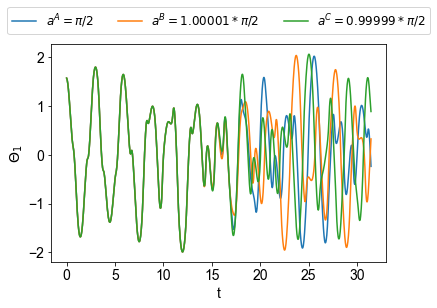

In [12]:
#Parámetros de la fuente del gráfico
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 14}
matplotlib.rc('font', **font)

#Grafico
plt.plot(datos[:,0], datos[:,1], label='$a^A = \pi/2$')
plt.plot(datos[:,0], datos[:,2], label='$a^B = 1.00001*\pi/2$')
plt.plot(datos[:,0], datos[:,3], label='$a^C = 0.99999*\pi/2$')

plt.legend(loc='lower center', ncol = 4,fontsize = 12, bbox_to_anchor=(0, 1.02, 1, 0.2))
plt.xlabel('t')
plt.ylabel('$\Theta_1$')
# plt.xticks(x, my_xticks)
# plt.yticks(np.arange(y.min(), y.max(), 0.005))
# plt.yticks(np.arange(-0.5,0.5 + 0.2,0.2))
# plt.xlim(10.0**-4, 10.0**0)

#Guardo el gráfico
plt.savefig('doble_3CI.pdf', format='pdf',bbox_inches = "tight")

#### 3 condiciones iniciales distintas - diferencias

In [13]:
#Importo datos
datos = genfromtxt('datos/doble_3CI_difs.csv', delimiter=',')

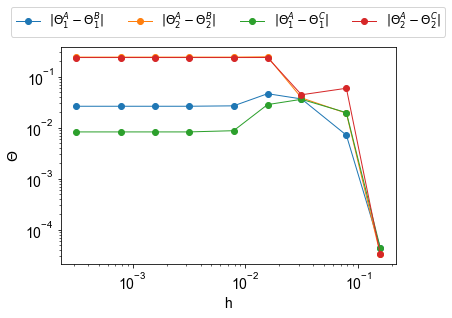

In [14]:
#Parámetros de la fuente del gráfico
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 14}
matplotlib.rc('font', **font)

#Grafico
plt.plot(datos[:,0], np.abs(datos[:,1]), label='$|\Theta_1^A - \Theta_1^B|$',marker='o',linewidth=1)
plt.plot(datos[:,0], np.abs(datos[:,2]), label='$|\Theta_2^A - \Theta_2^B|$',marker='o',linewidth=1)
plt.plot(datos[:,0], np.abs(datos[:,3]), label='$|\Theta_1^A - \Theta_1^C|$',marker='o',linewidth=1)
plt.plot(datos[:,0], np.abs(datos[:,4]), label='$|\Theta_2^A - \Theta_2^C|$',marker='o',linewidth=1)

plt.legend(loc='lower center', ncol = 4,fontsize = 12, bbox_to_anchor=(0, 1.02, 1, 0.2))
plt.xlabel('h')
plt.ylabel('$\Theta$')
# plt.xticks(x, my_xticks)
# plt.yticks(np.arange(y.min(), y.max(), 0.005))
# plt.yticks(np.arange(-0.5,0.5 + 0.2,0.2))
# plt.xlim(10.0**-4, 10.0**0)
plt.xscale("log")
plt.yscale("log")

#Guardo el gráfico
plt.savefig('doble_3CI_difs.pdf', format='pdf',bbox_inches = "tight")

#### 1 condición inicial - trayectorias

In [15]:
#Importo datos
datos = genfromtxt('datos/doble_1CI_trayectorias.csv', delimiter=',')

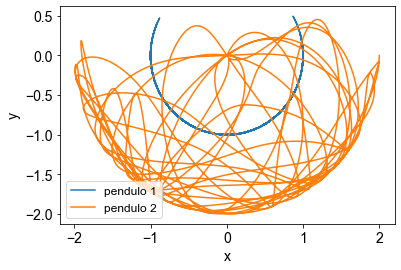

In [16]:
#Parámetros de la fuente del gráfico
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 14}
matplotlib.rc('font', **font)

plt.plot(datos[:,0],datos[:,1], label='pendulo 1')
plt.plot(datos[:,2],datos[:,3], label='pendulo 2')

plt.legend(loc='lower left', ncol = 1,fontsize = 12)
plt.xlabel('x')
plt.ylabel('y')
# plt.xticks(x, my_xticks)
# plt.yticks(np.arange(y.min(), y.max(), 0.005))
# plt.yticks(np.arange(-0.5,0.5 + 0.2,0.2))
# plt.xlim(10.0**-4, 10.0**0)

#Guardo el gráfico
plt.savefig('doble_1CI_trayectorias.pdf', format='pdf',bbox_inches = "tight")

#### Error de amplitud

In [17]:
#Importo datos
datos = genfromtxt('datos/doble_error_amplitud.csv', delimiter=',')

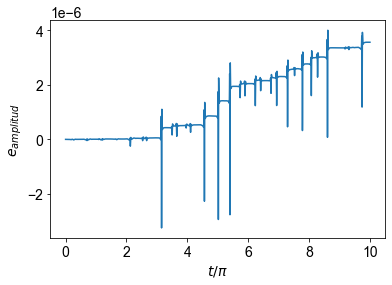

In [18]:
#Parámetros de la fuente del gráfico
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 14}
matplotlib.rc('font', **font)

plt.plot(datos[:,0]/pi,datos[:,1])

# plt.legend(loc='lower left', ncol = 1,fontsize = 12)
plt.xlabel('$t/\pi$')
plt.ylabel('$e_{amplitud}$')
# plt.xticks(x, my_xticks)
# plt.yticks(np.arange(y.min(), y.max(), 0.005))
# plt.yticks(np.arange(-0.5,0.5 + 0.2,0.2))
# plt.xlim(10.0**-4, 10.0**0)

#Guardo el gráfico
plt.savefig('doble_error_amplitud.pdf', format='pdf',bbox_inches = "tight")

#### Orden de convergencia del error de amplitud

In [19]:
#Importo datos
datos = genfromtxt('datos/doble_orden_error_amplitud.csv', delimiter=',')

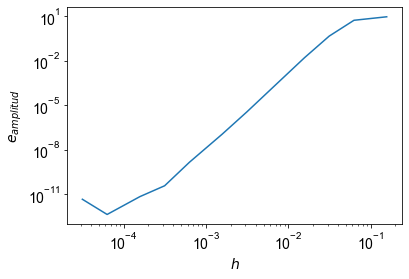

In [20]:
#Parámetros de la fuente del gráfico
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 14}
matplotlib.rc('font', **font)

plt.plot(datos[:,0],datos[:,1])

# plt.legend(loc='lower left', ncol = 1,fontsize = 12)
plt.xlabel('$h$')
plt.ylabel('$e_{amplitud}$')
# plt.xticks(x, my_xticks)
# plt.yticks(np.arange(y.min(), y.max(), 0.005))
# plt.yticks(np.arange(-0.5,0.5 + 0.2,0.2))
# plt.xlim(10.0**-4, 10.0**0)
plt.xscale("log")
plt.yscale("log")

#Guardo el gráfico
plt.savefig('doble_orden_error_amplitud.pdf', format='pdf',bbox_inches = "tight")